# partY explains variation in visual IQ of males

In this analysis the relationship between visual IQ and partY is analyzed using a linear regression model. First, we are going to import the data and generate the variable. Our variable partY will follow a gaussian distribution, making it suitable for parametric statistical tests.

In [2]:
import random
import pandas

# read in brain size data

data = pandas.read_csv('../data/brainsize.csv', sep=';', index_col=0, na_values=".").dropna()

# generate random gaussian

random.seed(12)
partY = [random.gauss(100, 15) for i in range(len(data))]
data['partY'] = partY
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,78.322185
3,Male,139,123,150,143.0,73.3,1038437,103.493397
4,Male,133,129,128,172.0,68.8,965353,95.828087
5,Female,137,132,134,147.0,65.0,951545,92.800823
6,Female,99,90,110,146.0,69.0,928799,114.503186


We are only interested in the male participants, so we select this subset of our data set.

In [131]:
# subset to only include male participants

data_male = data[data['Gender'] == 'Male']

## Visualization

To get a first impression of the data, we are going to visualize it using a `seaborn` scatterplot/regression line.

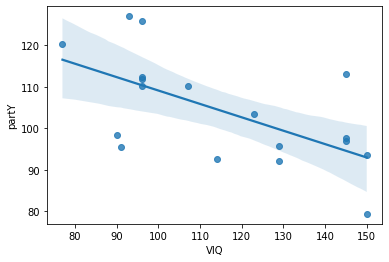

In [134]:
import seaborn as sns

# plot VIQ and partY

sns.regplot(data_male.VIQ, data_male.partY)

## Statistical Analysis

As we can see, visual IQ and partY seem to show a negative linear relationship in the male participants. Next, we are going to build a linear regression model to test this using the `scipy.stats` module.

In [140]:
from scipy import stats

# linear regression model

slope, intercept, r_value, p_value, std_err = stats.linregress(data_male.VIQ, data_male.partY)
print("Slope:", slope, "P-value:", p_value, "R-squared:", r_value**2)

Slope: -0.3231687799523172 P-value: 0.006498162757245594 R-squared: 0.3793545687503652


It was found that VIQ ($\beta$ = -0.323, p < 0.5) is a significant predictor of partY, with a model fit of R$^2$ = 0.38.

## Check with partY2

Slope: -0.1337686512128251 P-value: 0.3361285973253568 R-squared: 0.057902062587242106


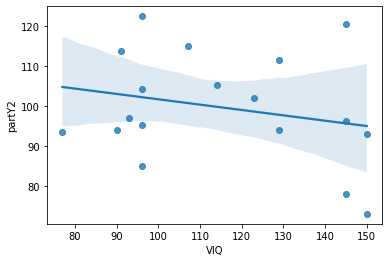

In [141]:
random.seed(123)
partY2 = [random.gauss(100, 15) for i in range(len(data))]
data['partY2'] = partY2
data_male = data[data['Gender'] == 'Male']
sns.regplot(data_male.VIQ, data_male.partY2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(data_male.VIQ, data_male.partY2)
print("Slope:",slope2,"P-value:", p_value2, "R-squared:", r_value2**2)